IS 675: Data Mining
Summer 2019
Homework Assignment 2 (Due June 23, 2019, midnight EST)


A. Use the wine dataset.   (70 points)

- Using sklearn load the wine dataset from datasets. (10)
- Create a dataframe for the predicting attribute and load the data. (10)
- Load the target attribute in a separate variable. (10)
- Build a decision tree classifier. (20)
- Visualize the tree. (20)


B.  Show the calculations for information gain on Age using the dataset shown in PPT slide # 2. Show the calculations for entropy and how the information gain is calculated from there. (30 points)


In [1]:
import sklearn
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

## A. Use the wine dataset. (70 points)

###  Using sklearn load the wine dataset from datasets. (10)

In [2]:
wine_dataset = datasets.load_wine()

print(wine_dataset.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Create a dataframe for the predicting attribute and load the data. (10)

In [3]:
wine_dataframe = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
wine_dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Load the target attribute in a separate variable. (10)

In [4]:
target_attribute = wine_dataset.target
target_attribute[:5]

array([0, 0, 0, 0, 0])

### Build a decision tree classifier. (20)

In [5]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(wine_dataframe, target_attribute)
decision_tree_classifier.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

### Visualize the tree. (20)

/home/sblack4/git/is675-intro-to-ml/venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


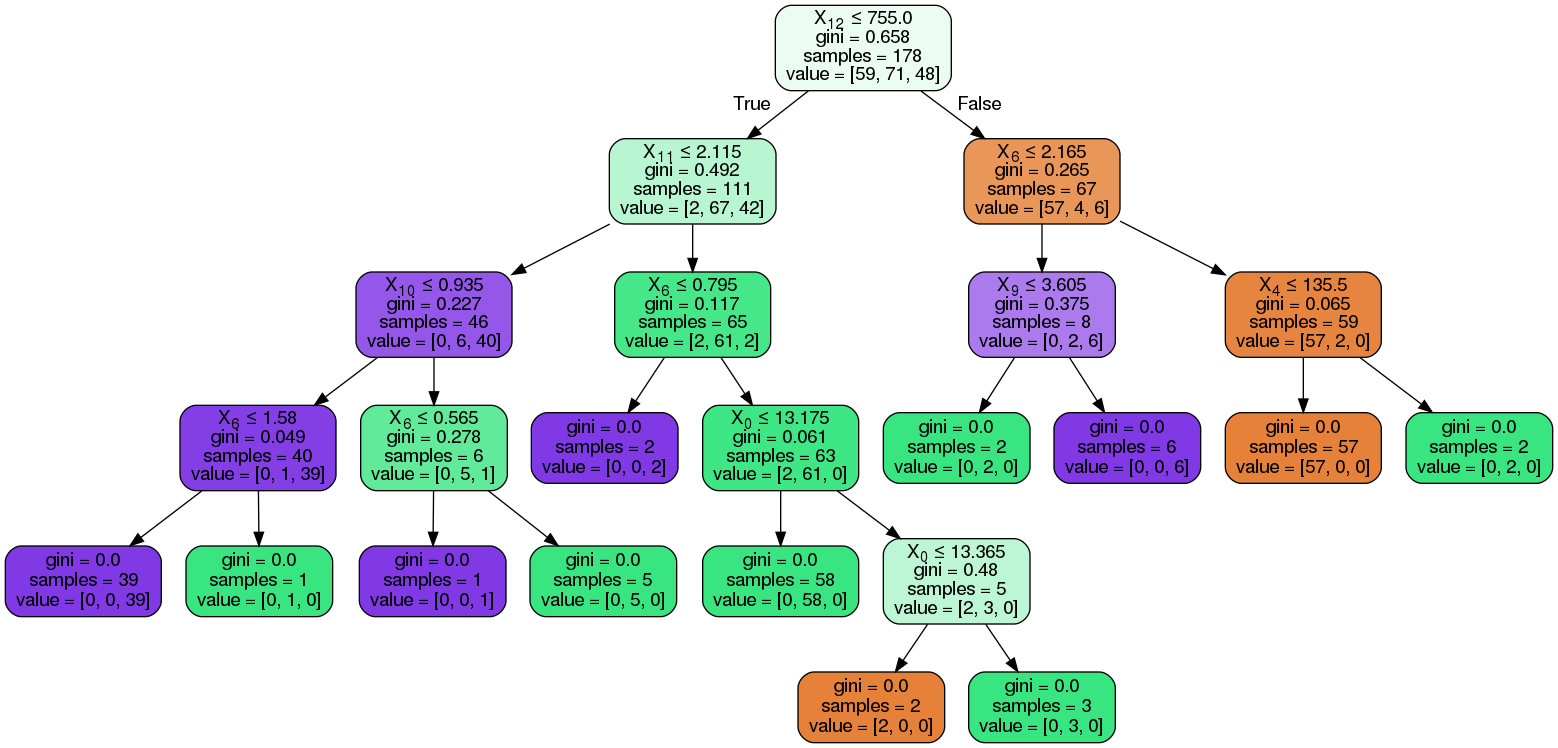

In [6]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#conda install -c conda-forge pydotplus 
#https://anaconda.org/conda-forge/pydotplus
import pydotplus 
dot_data = StringIO()
export_graphviz(decision_tree_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## B. Show the calculations for information gain on Age using the dataset shown in PPT slide # 2. Show the calculations for entropy and how the information gain is calculated from there. (30 points)

![entropy example dataset](entropy_example.png)

### entropy

In [7]:
from math import log 

print('group 1: <=30; group 2: 31...40; group 3: >40')
number_group_1 = 5
number_group_2 = 4
number_group_3 = 5
total = 14

def entropy_element(group_count, total):
    return - log(group_count/total, 2) * (group_count/total)

def calculate_entropy(groups_list):
    if not groups_list:
        return 0
    group_count = groups_list.pop()
    group_entorpy = 0 if group_count == 0 else entropy_element(group_count, total)
    entropy = group_entorpy \
        + calculate_entropy(groups_list)
    return entropy

entropy = calculate_entropy([number_group_1, number_group_2, number_group_3])

print('entropy: ', entropy)

group 1: <=30; group 2: 31...40; group 3: >40
entropy:  1.5774062828523452


### information gain 

In [8]:
buys_computer_yes = 9
buys_computer_no = 5

info_gain = (number_group_1/total) * calculate_entropy([2,3]) \
    + (number_group_2/total) * calculate_entropy([4,0]) \
    + (number_group_3/total) * calculate_entropy([3,2])

print('information gain: ', info_gain)

information gain:  0.7741660705824858
